In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
df=pd.read_csv("master_dataset_again.csv")

In [99]:
X = df.drop(['Country', 'Year','VACCINE:Vaccine','AGE:Current age','OBS_VALUE:Observation Value','GDP per capita (current US$)'], axis=1)
y=df['GDP per capita (current US$)']


In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
y.head()

0    196.763143
1    354.406246
2    313.886662
3    685.685748
4    697.142680
Name: GDP per capita (current US$), dtype: float64

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [102]:
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    enable_categorical=True # Enable native categorical data support
)

# Fit the model to the training data. The fit() method accepts DataFrames directly.
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,True
,eval_metric,None


In [103]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 4773168.7990


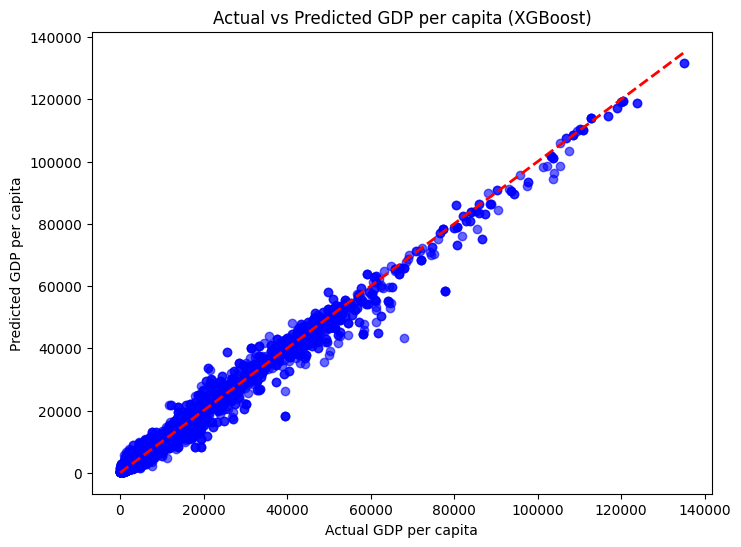

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # reference line
plt.xlabel("Actual GDP per capita")
plt.ylabel("Predicted GDP per capita")
plt.title("Actual vs Predicted GDP per capita (XGBoost)")
plt.show()


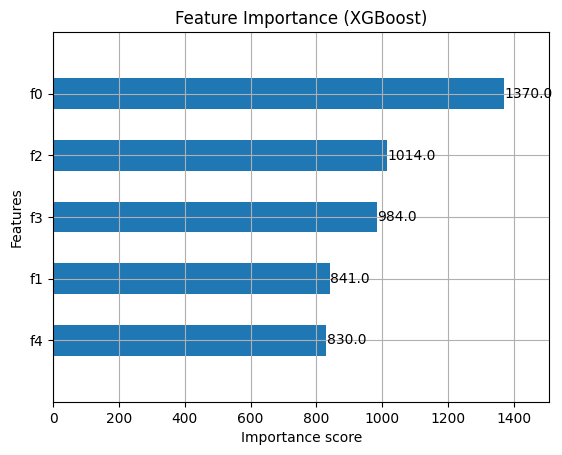

In [125]:
xgb.plot_importance(model, importance_type="weight", height=0.5)
plt.title("Feature Importance (XGBoost)")
plt.show()



In [ ]:

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X.columns.tolist(), enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=X.columns.tolist(), enable_categorical=True)



# Define parameters for the native API
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Train the model using the native xgb.train() function
bst = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions using the native API
predictions_native = bst.predict(dtest)

# Evaluate the native model
mse_native = mean_squared_error(y_test, predictions_native)
print(f"Native API Mean Squared Error: {mse_native:.4f}")


Native API Mean Squared Error: 1116345.6865


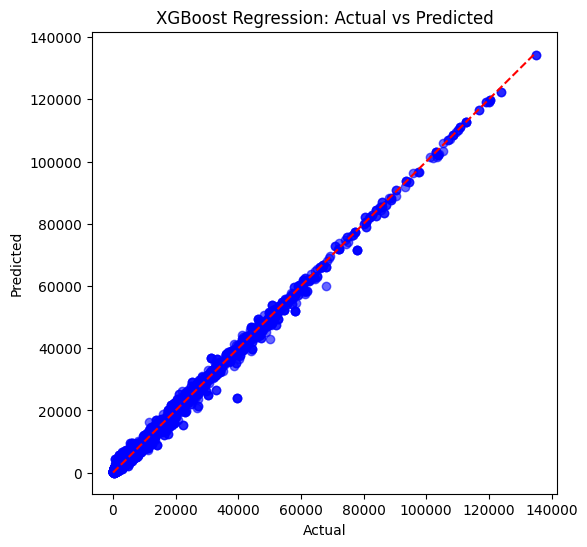

In [131]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, predictions_native, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost Regression: Actual vs Predicted")
plt.show()

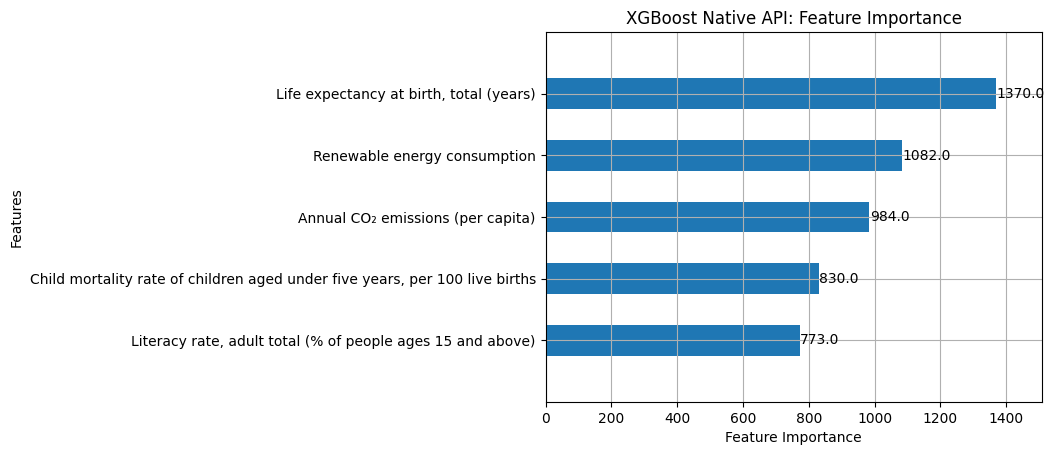

In [133]:
xgb.plot_importance(
    bst,
    max_num_features=10,
    importance_type='weight',
    height=0.5,
    xlabel='Feature Importance',
    ylabel='Features',
    show_values=True,
    title="XGBoost Native API: Feature Importance"
    
)
plt.show()


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [65]:
# Select the independent variable (X) and dependent variable (y)
X_simple = df[['GDP per capita (current US$)']] # Notice the double brackets for DataFrame subsetting
y_simple = df['Literacy rate, adult total (% of people ages 15 and above)']

# Split the data into training and testing sets
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Create and fit the simple linear regression model
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)

# Make predictions on the test set
y_pred_s = model_simple.predict(X_test_s)

# Print the model's coefficients and intercept
print("\n--- Simple Linear Regression Results ---")
print(f"Coefficient (slope): {model_simple.coef_[0]:.4f}")
print(f"Intercept: {model_simple.intercept_:.4f}")

# Evaluate the model
mse_simple = mean_squared_error(y_test_s, y_pred_s)
print(f"Mean Squared Error: {mse_simple:.4f}")



--- Simple Linear Regression Results ---
Coefficient (slope): 0.0001
Intercept: 76.5023
Mean Squared Error: 90.4761


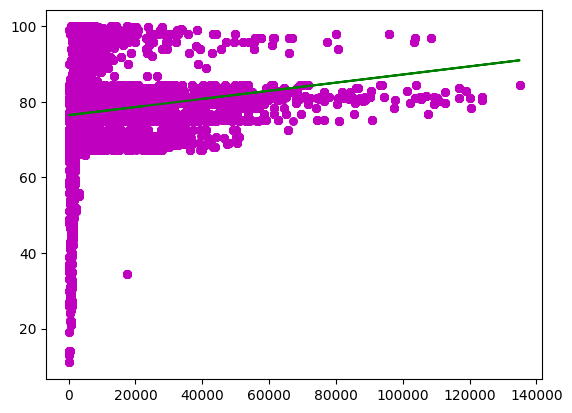

In [ ]:
plt.scatter(X_train_s, y_train_s, color = "m",marker = "o", s = 30)

plt.plot(X_test_s, y_pred_s, color = "g")



In [90]:
X = df[[
    "Life expectancy at birth, total (years)",
    "Renewable energy consumption","Literacy rate, adult total (% of people ages 15 and above)",
    "Annual CO₂ emissions (per capita)",
    "Child mortality rate of children aged under five years, per 100 live births"
]]
y = df["GDP per capita (current US$)"]


In [91]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [93]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [94]:
y_pred = model.predict(X_test)


In [96]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")


Mean Squared Error: 182391036.1782
R^2 Score: 0.4079


In [97]:
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


Life expectancy at birth, total (years): 17335.1259
Renewable energy consumption: 2512.4287
Literacy rate, adult total (% of people ages 15 and above): 621.7411
Annual CO₂ emissions (per capita): 6724.6052
Child mortality rate of children aged under five years, per 100 live births: 9410.4437
Intercept: 10972.5922
